## En este programa integramos el problema de N-cuerpos

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Constantes

In [59]:
G = 4.299e-6   # Unidades kpc*Msol^-1*(km/s)**2
eps = 0.9      #softening 
N   = 1000
m = np.ones(N)*1e10
m = m/N

### Generamos las condiciones iniciales

In [29]:
import random
import uniform_density as ud

range_r3  = np.linspace(0, 1/3., 2*N)
range_ct  = np.linspace(-1, 1, 2*N)
range_phi = np.linspace(0, 2*np.pi, 2*N)

random.seed(15)
r3  = random.sample(range_r3,  N) #r**3
ct  = random.sample(range_ct,  N) #cos(t)
phi = random.sample(range_phi, N) #phi

r3  = np.asarray(r3)
ct  = np.asarray(ct)
phi = np.asarray(phi)

st = np.sqrt(1. - ct**2) #sen(t)

xi = (r3*3)**(1/3.) * st * np.cos(phi)
yi = (r3*3)**(1/3.) * st * np.sin(phi)
zi = (r3*3)**(1/3.) * ct
    
# x, y, z = ud.dens(N)

xi = xi*100
yi = yi*100
zi = zi*100

# vxi = np.zeros(N)
# vyi = np.zeros(N)
# vzi = np.zeros(N)

sample = np.arange(0,1,1e-5)

vxi = random.sample(sample, N)
vyi = random.sample(sample, N)
vzi = random.sample(sample, N)

vxi = np.asarray(vxi)
vyi = np.asarray(vxi)
vzi = np.asarray(vxi)

In [4]:
Lxi = np.sum(m*(yi*vzi - zi*vyi))
Lyi = np.sum(m*(zi*vxi - xi*vzi))
Lzi = np.sum(m*(xi*vyi - yi*vxi))

Li = np.sqrt(Lxi**2 + Lyi**2 + Lzi**2)

print 'Lx_i = ', Lxi
print 'Ly_i = ', Lyi
print 'Lz_i = ', Lzi
print 'Lt_i = ', Li

Lx_i =  5528397851.379747
Ly_i =  -421039942.91346455
Lz_i =  -5107357908.466282
Lt_i =  7538273160.46864


In [5]:
pos = np.ndarray([N,3])
pos[:,0] = xi
pos[:,1] = yi
pos[:,2] = zi

#print pos

vel = np.ndarray([N,3])
vel[:,0] = vxi
vel[:,1] = vyi
vel[:,2] = vzi

# np.savetxt('/home/omarioni/mn2/_data/NC/pos_Ncuerpos.dat', pos)
# np.savetxt('/home/omarioni/mn2/_data/NC/vel_Ncuerpos.dat', vel)

np.savetxt('/home/omarioni/mn2/_data/NC_vel_random/pos_Ncuerpos.dat', pos)
np.savetxt('/home/omarioni/mn2/_data/NC_vel_random/vel_Ncuerpos.dat', vel)
# print vel

In [60]:
# posi = loadtxt('/home/omarioni/mn2/_data/NC/pos_Ncuerpos.dat')
posi = loadtxt('/home/omarioni/mn2/_data/NC_vel_random/pos_Ncuerpos.dat')
x = posi[:,0]
y = posi[:,1]
z = posi[:,2]

# veli = loadtxt('/home/omarioni/mn2/_data/NC/vel_Ncuerpos.dat')
veli = loadtxt('/home/omarioni/mn2/_data/NC_vel_random/vel_Ncuerpos.dat')
vx = veli[:,0]
vy = veli[:,1]
vz = veli[:,2]

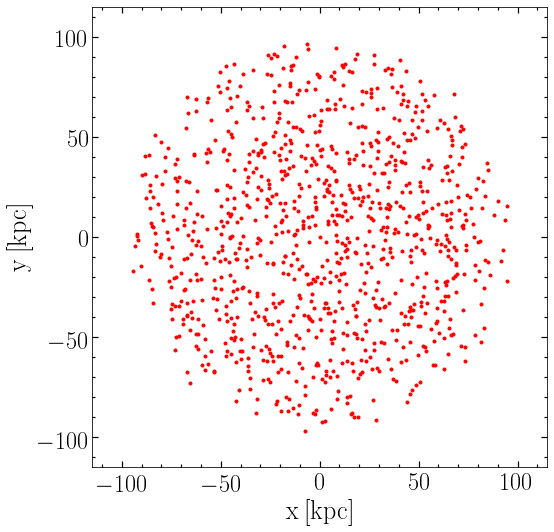

In [8]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(x,y,'.r')

ax.set_xlim(-115,115)
ax.set_ylim(-115,115)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$\mathrm{x\:[kpc]}$', fontsize=26)
ax.set_ylabel(r'$\mathrm{y\:[kpc]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [61]:
from integradorespnc import *
ax,ay,az = integradores_modificado.aceleracion(eps,m,x,y,z)

### Acá definimos el paso y el numero de pasos

In [62]:
dt = 0.005  #paso
nit = 2000   #numero de pasos

# EULER

In [11]:
from integradorespnc import *
integradores_modificado.euler(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

(array([-8.23876476e+00, -6.54821825e+00, -4.15953064e+00, -2.72156658e+01,
        -1.24317047e+02, -3.34890985e+00, -1.10419064e+01, -4.58055019e+00,
        -3.18853903e+00, -6.50654936e+00, -7.28502607e+00, -7.79935312e+00,
         1.31787582e+02, -1.08323616e+02,  1.45745483e+02,  9.01533604e+00,
        -5.94538355e+00,  1.23238884e+02, -7.67094574e+01, -6.52402782e+00,
        -9.85930176e+01, -6.54592514e+00, -7.16233349e+00, -5.79083872e+00,
         5.59867382e-01, -7.41424894e+00, -1.16324205e+01, -1.05651176e+02,
         1.42013273e+01, -4.20289803e+00, -1.98101938e+00, -4.09418030e+01,
        -5.39144754e+00,  1.22696657e+01, -1.25126266e+01, -3.11314850e+01,
        -1.25053053e+01,  7.88987350e+01, -1.49646587e+01,  9.68029480e+01,
        -1.13380859e+02,  9.02547760e+01, -4.94099371e-02, -4.43629265e+00,
        -1.10249458e+02,  7.71574020e+01, -1.06731491e+01,  1.28019743e+01,
        -3.56123638e+00,  1.51226852e+02,  1.16324371e+02, -6.10643768e+01,
        -6.6

In [12]:
import numpy as np
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'

posf = np.loadtxt(path+'pos_euler.dat')
xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_euler.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print np.shape(xf)
print np.shape(vxf)

(201, 1000)
(201, 1000)


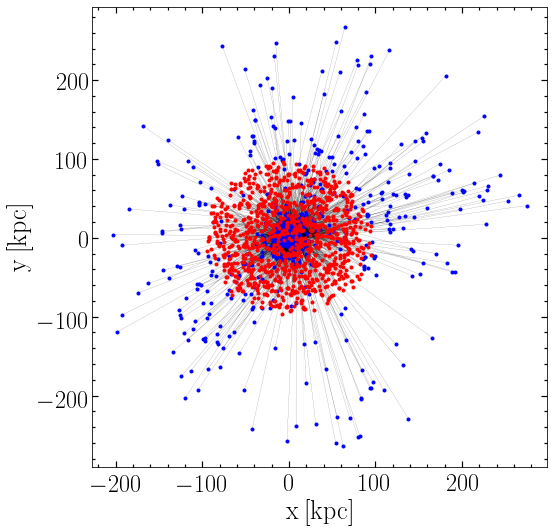

In [13]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf,yf,'-k', lw=0.1)#, markersize=0.05)
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.plot(xf[0,:],yf[0,:],'.r')
# ax.set_xlim(-115,115)
# ax.set_ylim(-115,115)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$\mathrm{x\:[kpc]}$', fontsize=26)
ax.set_ylabel(r'$\mathrm{y\:[kpc]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [18]:
time = dt * np.arange(0,nit+10,10)

Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

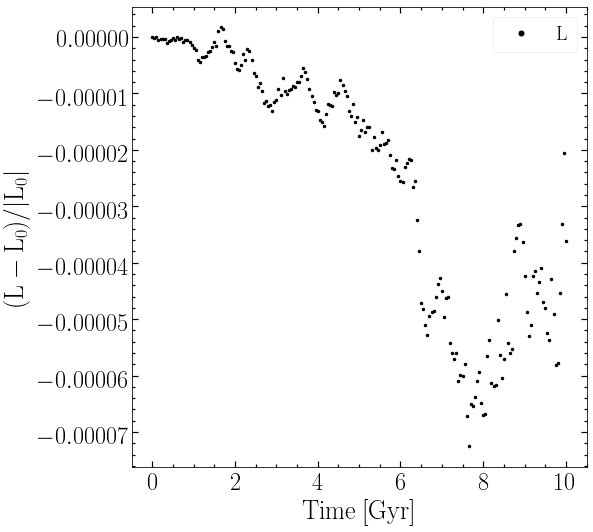

In [19]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(time,(L-L[0])/abs(L[0]),'.k', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(L-L_{0})/|L_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

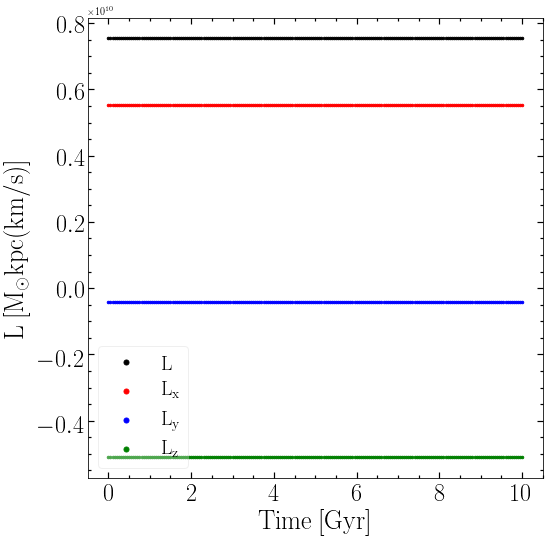

In [22]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=5)
Lx_ = ax.plot(time,Lx,'.r', markersize=5)
Ly_ = ax.plot(time,Ly,'.b', markersize=5)
Lz_ = ax.plot(time,Lz,'.g', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [23]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [24]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'

np.savetxt(path+'epot_euler.dat', e_pot)

In [25]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'
epot = np.loadtxt(path + 'epot_euler.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(201,)
(201,)


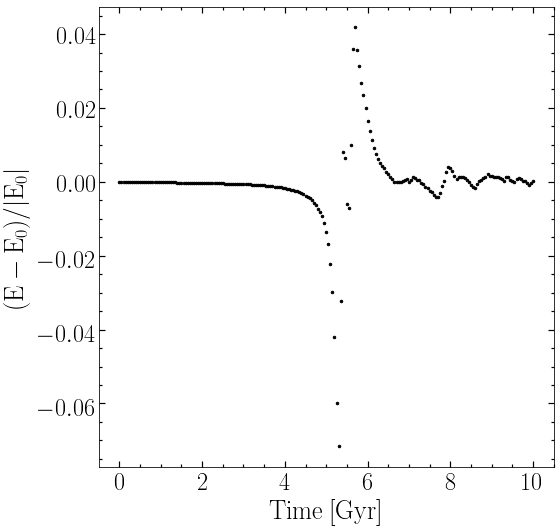

In [26]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

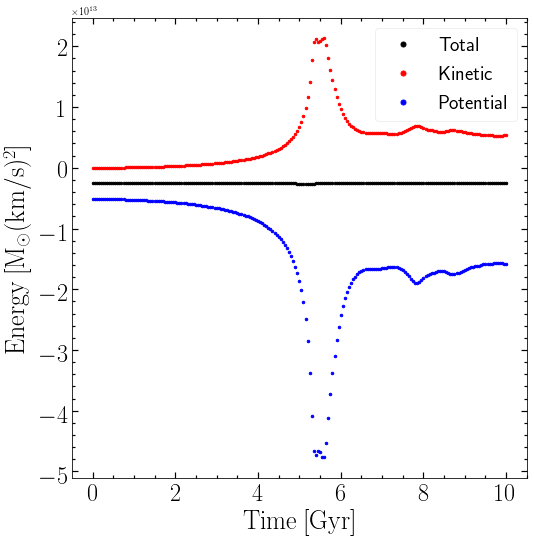

In [27]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=5)
Ecin = ax.plot(time,K,'.r', markersize=5)
Epot = ax.plot(time,-U,'.b', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)

ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# RUNGE-KUTTA

In [33]:
from integradorespnc import *
integradores_modificado.rungek(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

(array([-7.31288338e+00, -8.53432083e+00, -3.38024545e+00, -2.64794979e+01,
        -1.25021919e+02, -3.43806648e+00, -9.43803215e+00, -5.86861897e+00,
        -3.94168210e+00, -9.41374016e+00, -5.45059013e+00, -9.67486572e+00,
         1.32442139e+02, -1.08571220e+02,  1.46375336e+02,  1.29475842e+01,
        -8.59183979e+00,  1.23810043e+02, -7.71356506e+01, -6.05920219e+00,
        -9.91036758e+01, -9.75542164e+00, -7.85934353e+00, -5.17954063e+00,
        -2.57318974e-01, -7.77692509e+00, -1.06738377e+01, -1.05987083e+02,
         1.42337952e+01, -2.63247085e+00, -1.88935268e+00, -4.11996880e+01,
        -6.39277220e+00,  1.26311893e+01, -1.24877901e+01, -3.19159508e+01,
        -1.23260679e+01,  7.93090363e+01, -1.42727518e+01,  9.72226791e+01,
        -1.13957664e+02,  9.07978973e+01,  4.15684509e+00, -4.05170631e+00,
        -1.10734871e+02,  7.73883820e+01, -1.10626554e+01,  1.15698214e+01,
        -3.62310719e+00,  1.51858139e+02,  1.16874977e+02, -6.12474518e+01,
        -6.1

In [34]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'

posf = np.loadtxt(path+'pos_runge.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_runge.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)


(201, 1000)


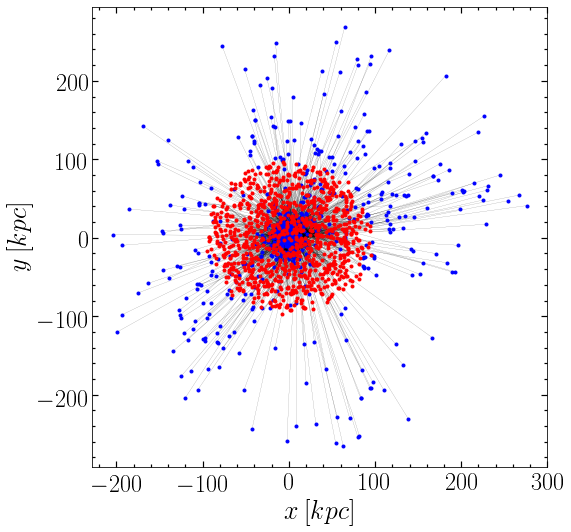

In [35]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(xf,yf,'-k', lw=0.1)#, markersize=0.05)
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.plot(xf[0,:],yf[0,:],'.r')

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [36]:
time = dt * np.arange(0,nit+10,10)

Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

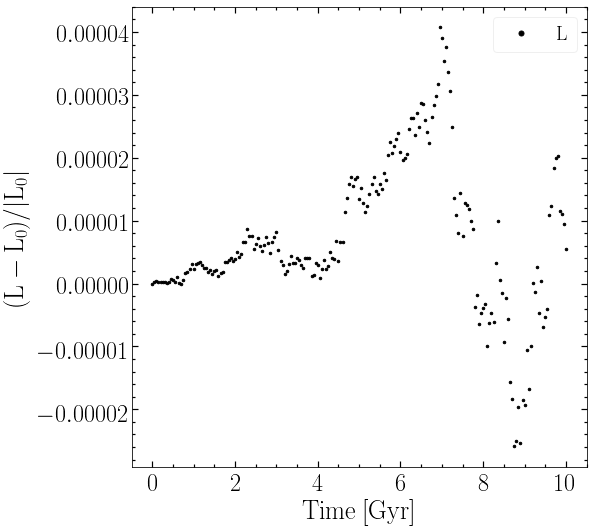

In [37]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(time,(L-L[0])/abs(L[0]),'.k', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(L-L_{0})/|L_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

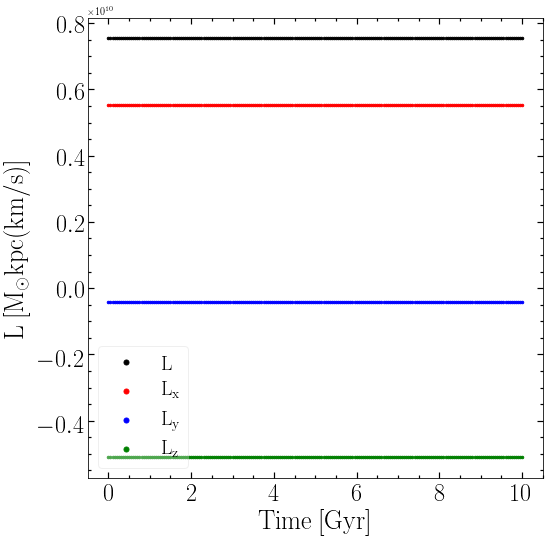

In [38]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=5)
Lx_ = ax.plot(time,Lx,'.r', markersize=5)
Ly_ = ax.plot(time,Ly,'.b', markersize=5)
Lz_ = ax.plot(time,Lz,'.g', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [39]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [40]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'
np.savetxt(path+'epot_runge.dat', e_pot)

In [41]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'
epot = np.loadtxt(path + 'epot_runge.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(201,)
(201,)


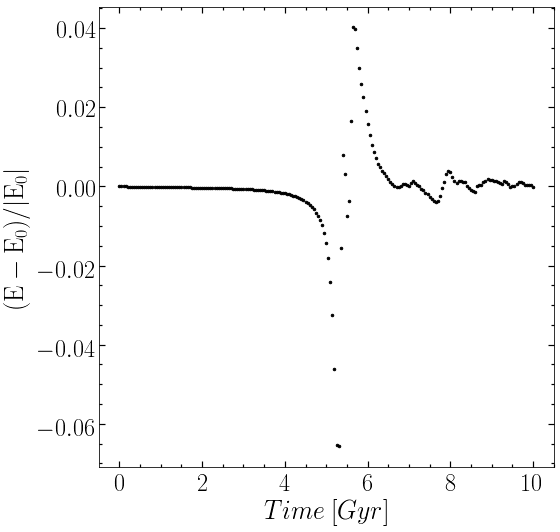

In [42]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

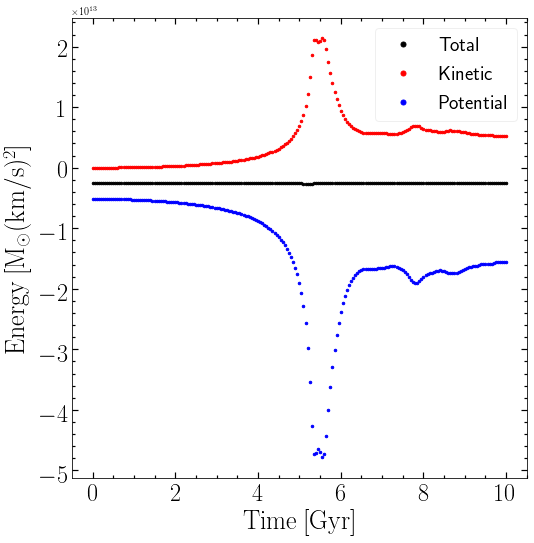

In [43]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=5)
Ecin = ax.plot(time,K,'.r', markersize=5)
Epot = ax.plot(time,-U,'.b', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)

ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - DKD

In [48]:
integradores_modificado.driftkdrift(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

(array([-7.88867950e+00, -6.19678879e+00, -2.64755321e+00, -2.67744999e+01,
        -1.24383926e+02, -5.32451570e-01, -1.87287064e+01, -8.79499316e-01,
        -2.42341805e+00, -6.47593856e-01, -7.66524267e+00, -8.75291252e+00,
         1.31760330e+02, -1.07789612e+02,  1.45221100e+02,  1.22676182e+01,
        -1.34193134e+01,  1.23086418e+02, -7.65406189e+01, -9.05331993e+00,
        -9.82068253e+01, -6.79179621e+00, -7.11364794e+00, -3.30586243e+00,
        -1.48227968e+01, -1.20732975e+01, -8.24412823e+00, -1.05108414e+02,
         1.48406525e+01, -7.95536423e+00, -1.80765867e+00, -4.11109161e+01,
        -3.39241123e+00,  1.17187614e+01, -9.25226974e+00, -3.10167179e+01,
        -7.09253216e+00,  7.94946518e+01, -1.79490471e+01,  9.68197861e+01,
        -1.13383072e+02,  9.03706207e+01,  5.50284576e+00,  1.20290363e+00,
        -1.10190811e+02,  7.72156067e+01, -9.92987347e+00, -2.08902950e+01,
        -9.80871391e+00,  1.51054199e+02,  1.16105995e+02, -6.07083359e+01,
        -7.9

In [49]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'

posf = np.loadtxt(path+'pos_DKD.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_DKD.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(201, 1000)


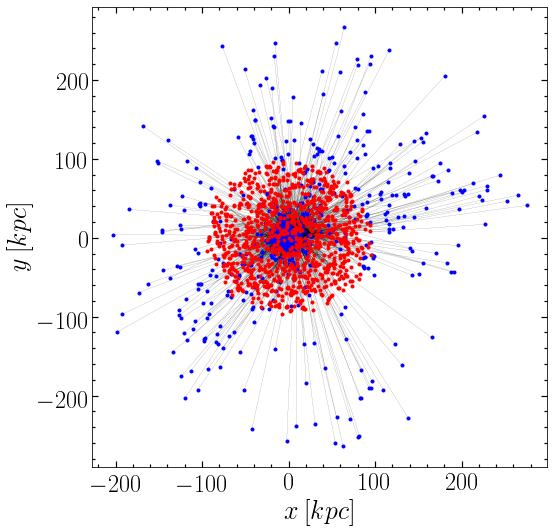

In [50]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(xf,yf,'-k', lw=0.1)#, markersize=0.05)
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.plot(xf[0,:],yf[0,:],'.r')

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [51]:
time = dt * np.arange(0,nit+10,10)

Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

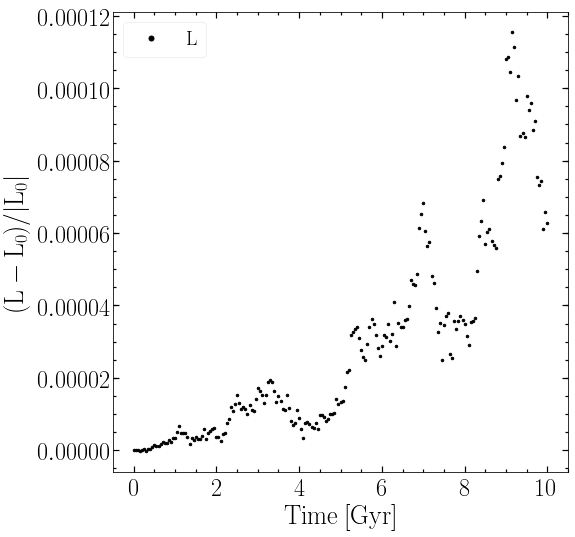

In [52]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(time,(L-L[0])/abs(L[0]),'.k', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(L-L_{0})/|L_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

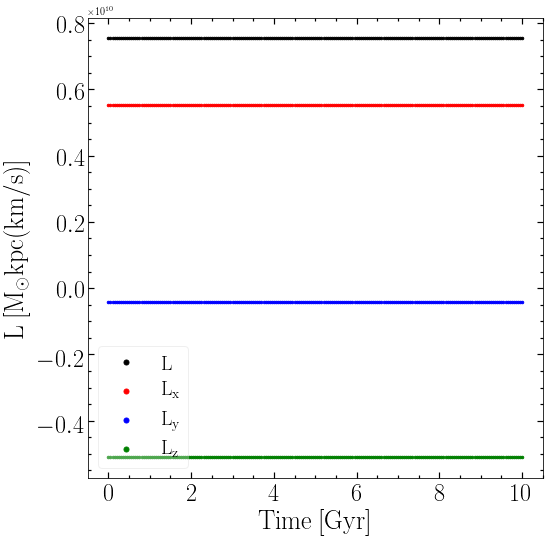

In [53]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=5)
Lx_ = ax.plot(time,Lx,'.r', markersize=5)
Ly_ = ax.plot(time,Ly,'.b', markersize=5)
Lz_ = ax.plot(time,Lz,'.g', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [54]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [55]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'
np.savetxt(path+'epot_DKD.dat', e_pot)

In [56]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'
epot = np.loadtxt(path + 'epot_DKD.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(201,)
(201,)


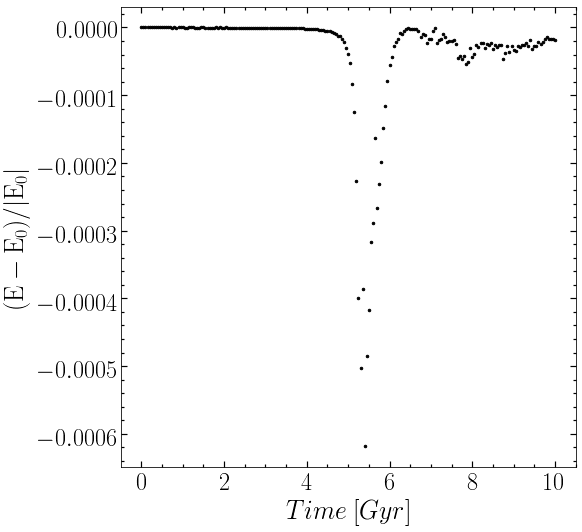

In [57]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

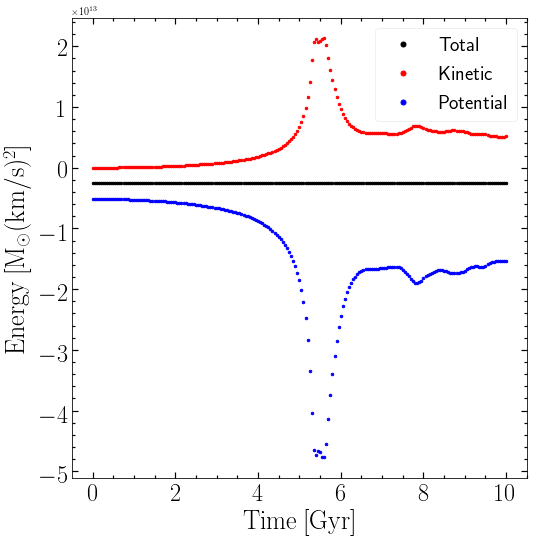

In [58]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=5)
Ecin = ax.plot(time,K,'.r', markersize=5)
Epot = ax.plot(time,-U,'.b', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

## Leapfrog - KDK

In [63]:
integradores_modificado.kickdkick(eps,dt,nit,m,x,y,z,vx,vy,vz,ax,ay,az)

(array([-6.84341621e+00, -6.61526728e+00, -3.36186028e+00, -2.63467808e+01,
        -1.24383469e+02, -1.48799360e+00, -1.79588108e+01, -2.47905254e+00,
        -3.15535188e+00, -5.66384494e-02, -6.69919443e+00, -8.71898937e+00,
         1.31707245e+02, -1.08062103e+02,  1.45268921e+02,  1.10924110e+01,
        -1.36065483e+01,  1.23073257e+02, -7.65347214e+01, -9.64712715e+00,
        -9.80735321e+01, -5.84373236e+00, -7.21945381e+00, -9.48891938e-01,
        -1.82756443e+01, -1.16630068e+01, -5.74310350e+00, -1.05215805e+02,
         1.49496336e+01, -8.73479080e+00, -2.14016032e+00, -4.11712227e+01,
        -3.32178378e+00,  1.11441746e+01, -1.01483936e+01, -2.70843296e+01,
        -7.35268116e+00,  7.95012360e+01, -1.67115746e+01,  9.67066803e+01,
        -1.13352600e+02,  9.04147186e+01,  4.34925127e+00, -4.55203414e-01,
        -1.10138359e+02,  7.71930313e+01, -9.62823105e+00, -2.02680588e+01,
        -9.81860161e+00,  1.51061829e+02,  1.16090027e+02, -6.06760712e+01,
        -8.1

In [64]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'

posf = np.loadtxt(path+'pos_KDK.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_KDK.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(201, 1000)


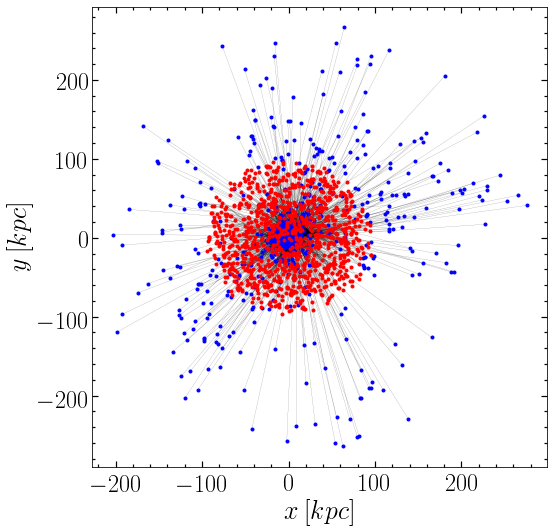

In [65]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(xf,yf,'-k', lw=0.1)#, markersize=0.05)
ax.plot(xf[-1,:],yf[-1,:],'.b')
ax.plot(xf[0,:],yf[0,:],'.r')

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [66]:
time = dt * np.arange(0,nit+10,10)

Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

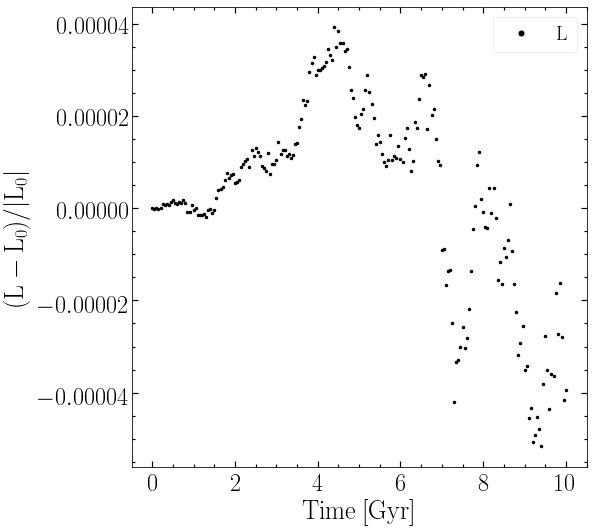

In [67]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

ax.plot(time,(L-L[0])/abs(L[0]),'.k', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(L-L_{0})/|L_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

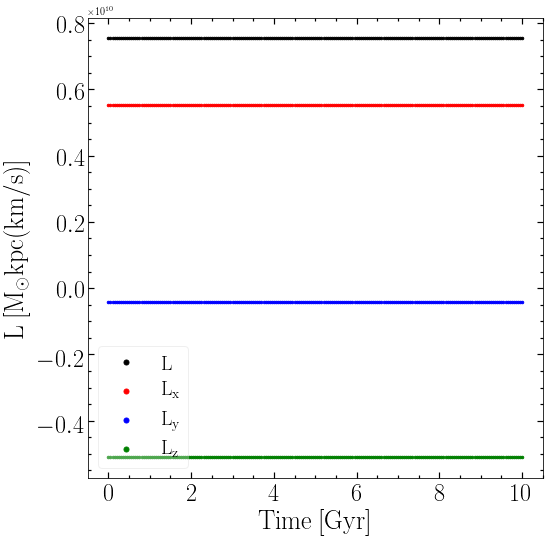

In [68]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=5)
Lx_ = ax.plot(time,Lx,'.r', markersize=5)
Ly_ = ax.plot(time,Ly,'.b', markersize=5)
Lz_ = ax.plot(time,Lz,'.g', markersize=5)

ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{x}}$','$\mathrm{L_{y}}$','$\mathrm{L_{z}}$'], loc='best', fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [69]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [70]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'
np.savetxt(path+'epot_KDK.dat', e_pot)

In [71]:
# path = '/home/omarioni/mn2/_data/NC/fortran_run/'
path = '/home/omarioni/mn2/_data/NC_vel_random/'
epot = np.loadtxt(path + 'epot_KDK.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(0,nit+10,10)


(201,)
(201,)


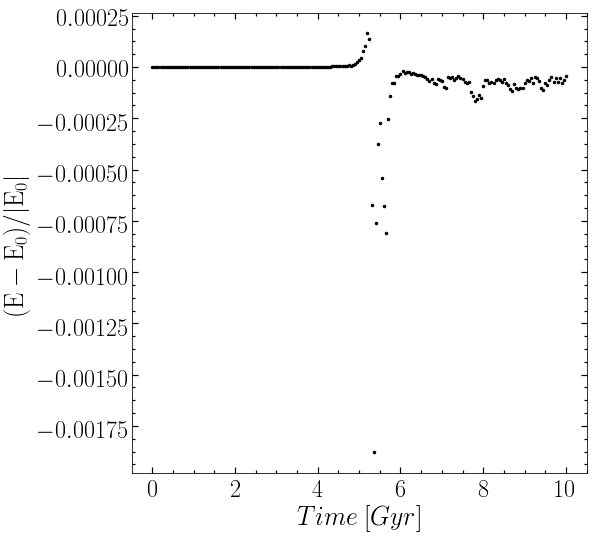

In [72]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\marthrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

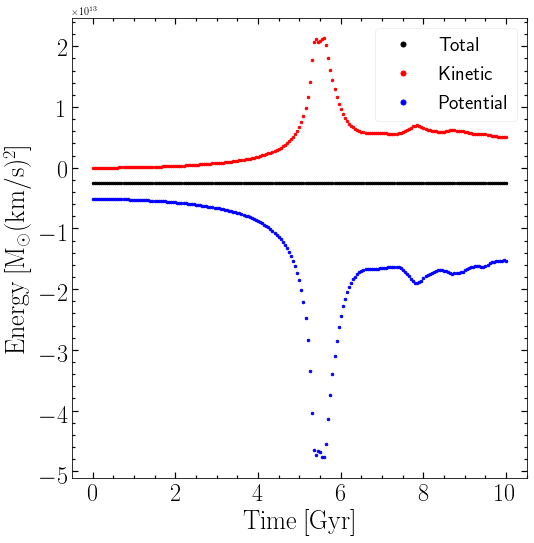

In [73]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
Etot = ax.plot(time,E,'.k', markersize=5)
Ecin = ax.plot(time,K,'.r', markersize=5)
Epot = ax.plot(time,-U,'.b', markersize=5)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['Total','Kinetic','Potential'], loc=1, fontsize=20,markerscale=2,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()